#### Warm Up

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('decision_tree.csv',header=None)
data.head()

,0,1,2
0,0.24539,0.81725,0
1,0.21774,0.76462,0
2,0.20161,0.69737,0
3,0.20161,0.58041,0
4,0.24770,0.49561,0


In [3]:
X = data[[0,1]]
y = data[[2]]

In [4]:
print(X.shape, y.shape)

(96, 2) (96, 1)


In [5]:
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf =2)
model.fit(X,y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [6]:
y_pred = model.predict(X)

In [7]:
accuracy = accuracy_score(y,y_pred)
accuracy

0.9895833333333334

In [8]:
result_dict = {}
for i in range (1,11):
    model = DecisionTreeClassifier(max_depth=7, min_samples_leaf =i)
    model.fit(X,y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y,y_pred)
    result_dict[i] = accuracy

    
result_dict

{1: 1.0,
 2: 0.9895833333333334,
 3: 0.96875,
 4: 0.96875,
 5: 0.96875,
 6: 0.96875,
 7: 0.96875,
 8: 0.9479166666666666,
 9: 0.8333333333333334,
 10: 0.8333333333333334}

In [9]:
result_dict = {}
for z in range (1,11):
    model = DecisionTreeClassifier(max_depth=z, min_samples_leaf =3)
    model.fit(X,y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y,y_pred)
    result_dict[z] = accuracy

    
result_dict

{1: 0.6666666666666666,
 2: 0.6875,
 3: 0.8229166666666666,
 4: 0.8333333333333334,
 5: 0.96875,
 6: 0.96875,
 7: 0.96875,
 8: 0.96875,
 9: 0.96875,
 10: 0.96875}

### Titanic Decision Tree

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Overview

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
len(data) # total rows in the dataset

891

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


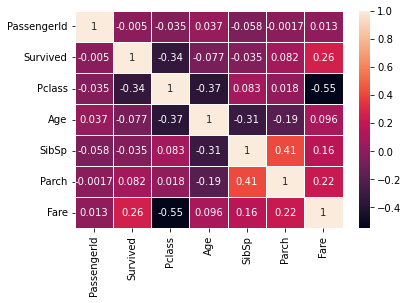

In [15]:
features_corr = sns.heatmap(data.corr(), annot=True, linecolor='white', linewidth=1)
# survival rate has high correlation with the fare

#### Find logic to fill embark na

In [16]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Find logic to fill age na

In [18]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'].isna().sum()

0

#### Extract Title from Name

#### Drop Cabin

In [19]:
data = data.drop(['Cabin','PassengerId','Ticket'],axis=1)
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
